In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression


# Importing dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

## datatypes of Dataset

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## No of unique values in each column

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Handling duplicate values

In [7]:
df.duplicated().sum()

0

## Unique values in each column

In [8]:
lam1 = lambda x: print('-' * 75, 
                       '\n\n', 
                       '{:^75}'.format(x), 
                       '\n\n', 
                       '-' * 75, 
                       '\n\n', 
                       np.array(df[x].unique()), 
                       end = '\n\n\n')

In [9]:
for x in df.columns:
    lam1(x)

--------------------------------------------------------------------------- 

                                 PassengerId                                 

 --------------------------------------------------------------------------- 

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Finding null values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Treating Embarked null values

In [12]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
df['Embarked'].mode()[0]

'S'

#### Embarked has two missing values having row ids 61,829. Three boarding ports are S, C, Q in which S has major probability of boarding from. We change the missing valued using mode()[0]

In [14]:
df.Embarked.mask(cond = df.Embarked == np.nan, other = df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df.Embarked.fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
df.Embarked.where(cond = lambda x: x != np.nan, other = lambda x: 'S', inplace=True)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Treating Cabin null values

In [20]:
cabin = np.array(df.Cabin.value_counts().index)
cabin.sort()

In [21]:
print(cabin)

['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B19' 'B20' 'B22' 'B28' 'B3' 'B30'
 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B57 B59 B63 B66' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B78' 'B79' 'B80'
 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104' 'C106' 'C110' 'C111'
 'C118' 'C123' 'C124' 'C125' 'C126' 'C128' 'C148' 'C2' 'C22 C26'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C54'
 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C82' 'C83' 'C85' 'C86' 'C87'
 'C90' 'C91' 'C92' 'C93' 'C95' 'C99' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D19'
 'D20' 'D21' 'D26' 'D28' 'D30' 'D33' 'D35' 'D36' 'D37' 'D45' 'D46' 'D47'
 'D48' 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17'
 'E24' 'E25' 'E31' 'E33' 'E34' 'E36' 'E38' 'E40' 'E44' 'E46' 'E49' 'E50'
 'E58' 'E63' 'E67' 'E68' 'E77' 'E8' 'F E69' 'F G63' 'F G73' 'F2' 'F33'
 'F38' 'F4' 'G6' 'T']


In [22]:
print('Total values in dataset'.ljust(30), ': {val}'.format(val = df.shape[0]))

print('Total values in Cabin'.ljust(30), ': {val}'.format(val = df.Cabin.value_counts().sum()))

print('Total missing values in Cabin'.ljust(30), ': {val}'.format(val = df.Cabin.isnull().sum()))

Total values in dataset        : 891
Total values in Cabin          : 204
Total missing values in Cabin  : 687


##### Cabin feature has more null values in dataset

### Treating Age NULL values

In [23]:
print(
    df.Age.mean(),
    df['Age'].median(),
    df['Age'].mode()[0]
)

29.69911764705882 28.0 24.0


In [24]:
df.Age.fillna(int(df.Age.mean()), inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Embarked vs Survived

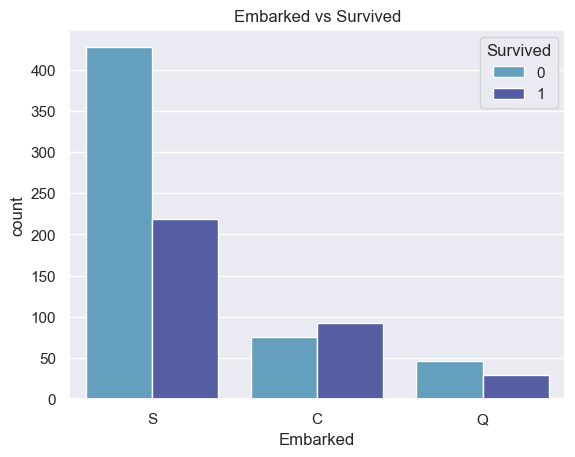

In [25]:
plt.figure(dpi=100)

sns.countplot(data=df, x = 'Embarked', hue='Survived', palette=sns.color_palette('icefire'))

plt.title('Embarked vs Survived')
plt.show()

### Sex vs Survived

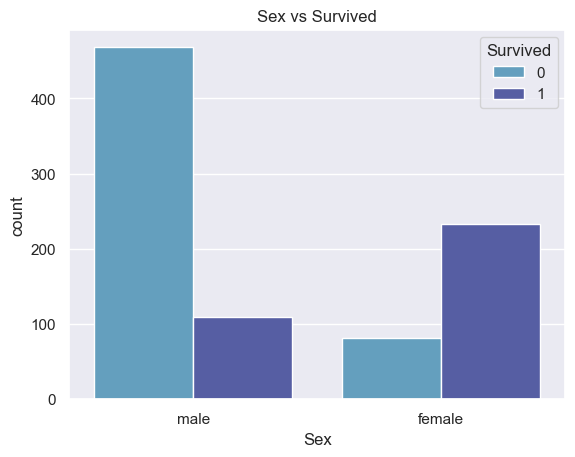

In [26]:
plt.figure(dpi=100)

sns.countplot(data=df, x='Sex', hue='Survived', palette=sns.color_palette('icefire'))

plt.title('Sex vs Survived')
plt.show()

### SibSp vs Survived

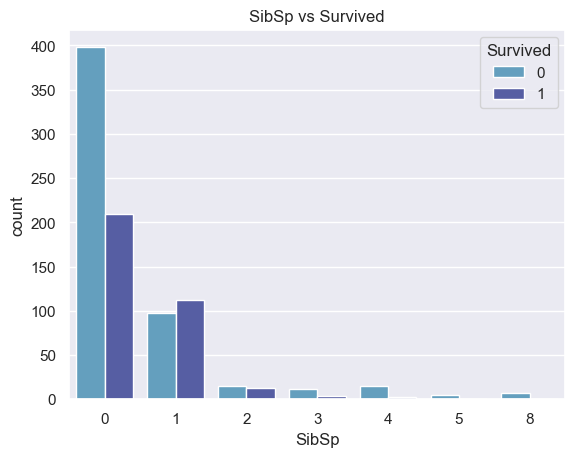

In [27]:
plt.figure(dpi=100)

sns.countplot(data=df, x='SibSp', hue='Survived', palette=sns.color_palette('icefire'))

plt.title('SibSp vs Survived')
plt.show()

### Parch vs Survived

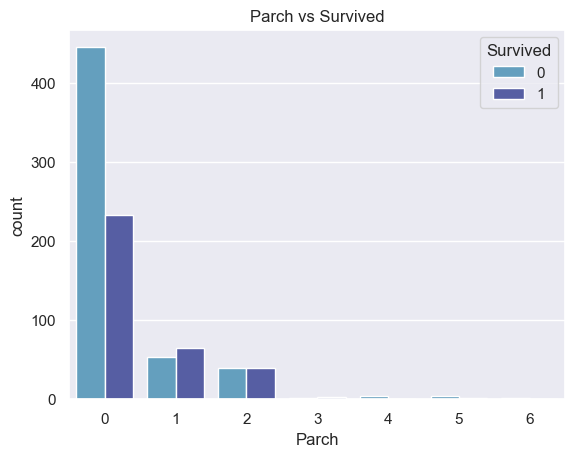

In [28]:
plt.figure(dpi=100)

sns.countplot(data=df, x='Parch', hue='Survived', palette=sns.color_palette('icefire'))

plt.title('Parch vs Survived')
plt.show()

In [29]:
df.drop(labels=['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

In [31]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,29.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


Text(0.5, 1.0, 'Correlation with features')

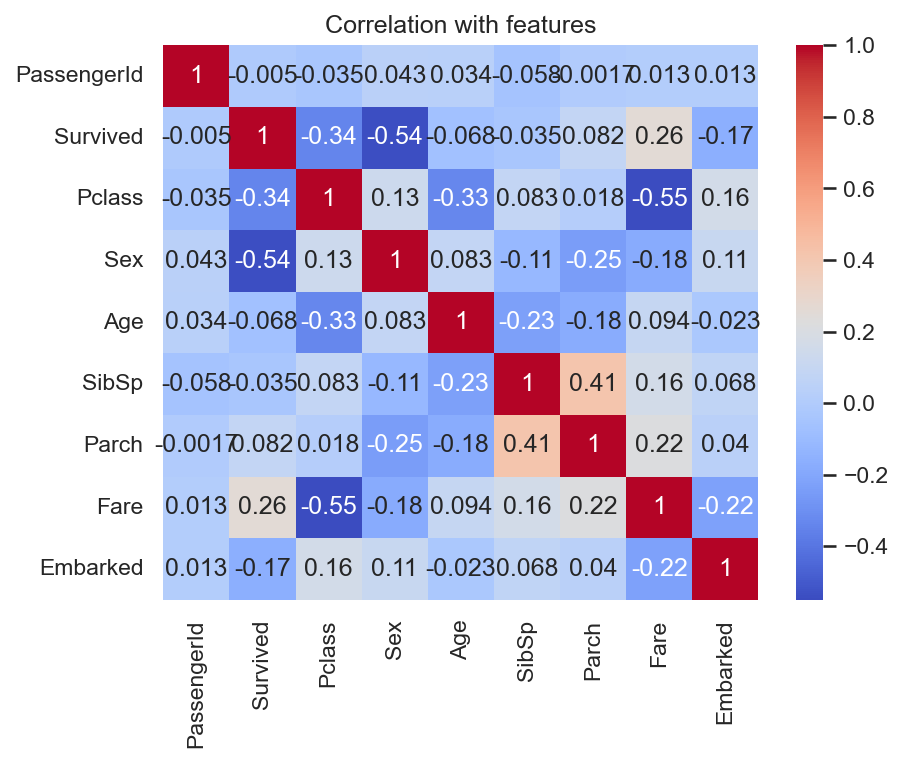

In [34]:
plt.figure(dpi=150)

sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation with features')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

output = df['Survived']
df.drop('Survived', axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df, output, test_size=0.3, random_state=13)

In [39]:
log.fit(x_train, y_train)

LogisticRegression()

In [40]:
log.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [41]:
log.score(x_test, y_test)

0.7910447761194029